# EDA Template


# Libraries

In [2]:
import sklearn
from sklearn import metrics
import seaborn as sea
import matplotlib as dibu
import warnings
warnings.filterwarnings('ignore')


# Importing data

In [4]:
from sklearn.datasets import california_housing
import pandas as pd
import numpy as np

housing_dataset = california_housing.fetch_california_housing()
data = pd.DataFrame(housing_dataset.data)
data.columns = housing_dataset.feature_names
features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']
target=['target']
#################### soccer ######################

soccer_names=['score_home_final','score_away_final','final_result','score_home_half_time','score_away_half_time','result_half_time','q0_1','q0_x','q0_2','home_shots','away_shots','home_shots_target','away_shots_target','home_faults','away_faults','home_corners','away_corners','home_yellow_cards','away_yellow_cards','home_red_cards','away_red_cards']

data=pd.read_csv('bet365_statistics_2014_2015_2016_2017.txt',names=soccer_names)
#data=pd.read_csv('bet365_statistics_2014_2015_2016.txt', error_bad_lines=False)
#print(data.columns)
#b'bet365_statistics_2014_2015_2016_2017.txt'

# POTENTIAL FEATURES. We include them all
features=['score_home_half_time', 'score_away_half_time', 'result_half_time',
       'q0_1', 'q0_x', 'q0_2', 'home_shots', 'away_shots', 'home_shots_target',
       'away_shots_target', 'home_corners', 'away_corners',
       'home_yellow_cards', 'away_yellow_cards', 'home_red_cards',
       'away_red_cards']
# SELECTED FEATURES
features=['result_half_time',
       'q0_1', 'q0_2', 'home_shots_target',
       'away_shots_target']
features=['score_home_half_time', 'score_away_half_time', 'result_half_time',
       'q0_1', 'q0_x', 'q0_2', 'home_shots', 'away_shots', 'home_shots_target',
       'away_shots_target', 'home_corners', 'away_corners',
       'home_yellow_cards', 'away_yellow_cards', 'home_red_cards',
       'away_red_cards']

target=['final_result']
#######################################################

data_train=data.sample(frac=0.6,replace=False)
data_test=data[~data.index.isin(data_train.index)]
data_train.info()
data_train.head(30)

x_train=data_train[features].values
y_train=data_train.final_result.values
x_test=data_test[features].values
y_test=data_test.final_result.values

# x and y for operations on the complete set of data
x_total=data[features].values
y_total=data.final_result.values



#y = housing_dataset.target
#target=y #ONLY IF NOT SPECIFIED TARGET AS A NAME









<class 'pandas.core.frame.DataFrame'>
Int64Index: 8342 entries, 5800 to 7714
Data columns (total 21 columns):
score_home_final        8342 non-null int64
score_away_final        8342 non-null int64
final_result            8342 non-null int64
score_home_half_time    8342 non-null int64
score_away_half_time    8342 non-null int64
result_half_time        8342 non-null int64
q0_1                    8342 non-null float64
q0_x                    8342 non-null float64
q0_2                    8342 non-null float64
home_shots              8342 non-null int64
away_shots              8342 non-null int64
home_shots_target       8342 non-null int64
away_shots_target       8342 non-null int64
home_faults             8342 non-null int64
away_faults             8342 non-null int64
home_corners            8342 non-null int64
away_corners            8342 non-null int64
home_yellow_cards       8342 non-null int64
away_yellow_cards       8342 non-null int64
home_red_cards          8342 non-null int64
away

# Metric

In [5]:
print(sklearn.metrics.SCORERS.keys())
metric='accuracy'

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


# Mutual information

In [7]:
from juanpy import mutual_info 
print('MUTUAL INFORMATION:\n')
mutual_info(data_train[features],data_train[target])



print(features)

MUTUAL INFORMATION:

The number of potential features is 5


This is the table of mutual information: [0.20626095352881088, 0.08842079406935849, 0.08742182021350003, 0.08435609976466621, 0.08180036849582528]


The most relevant feature is:  0


 Next the subset of relevant features and their corresponding weights
[0, 4, 3]
[0, 0.010046869782860318, 0.029664483592240887, 0, 0]
['result_half_time', 'q0_1', 'q0_2', 'home_shots_target', 'away_shots_target']


## Random Forest. Feature importance

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
#from sklearn.metrics import metrics
import sklearn
from sklearn.metrics import mean_squared_error

print(sklearn.metrics.SCORERS.keys())
rf = RandomForestClassifier()
#rf = RandomForestRegressor()



dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


In [197]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [198]:
pred = rf.predict(x_test)

In [199]:
print('RANDOM FOREST PERFORMANCE WITH DATA SET SPLITING')
print(accuracy_score(y_test, pred))
#mean_squared_error(y,pred)

RANDOM FOREST PERFORMANCE WITH DATA SET SPLITING
0.6244156778137361


In [200]:
#NEXT NOT SUPPORTED WITH REGRESSION

print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[1196  289  232]
 [ 455  463  475]
 [ 232  406 1814]]
              precision    recall  f1-score   support

          -1       0.64      0.70      0.66      1717
           0       0.40      0.33      0.36      1393
           1       0.72      0.74      0.73      2452

   micro avg       0.62      0.62      0.62      5562
   macro avg       0.58      0.59      0.59      5562
weighted avg       0.61      0.62      0.62      5562



In [201]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: result_half_time     Importance: 0.0938
Variable: q0_2                 Importance: 0.0907
Variable: home_shots_target    Importance: 0.0842
Variable: q0_1                 Importance: 0.083
Variable: away_shots_target    Importance: 0.0761
Variable: home_shots           Importance: 0.0736
Variable: away_shots           Importance: 0.0727
Variable: home_corners         Importance: 0.0672
Variable: score_home_half_time Importance: 0.0661
Variable: away_corners         Importance: 0.0626
Variable: q0_x                 Importance: 0.0597
Variable: score_away_half_time Importance: 0.0548
Variable: away_yellow_cards    Importance: 0.0473
Variable: home_yellow_cards    Importance: 0.046
Variable: home_red_cards       Importance: 0.0116
Variable: away_red_cards       Importance: 0.0107


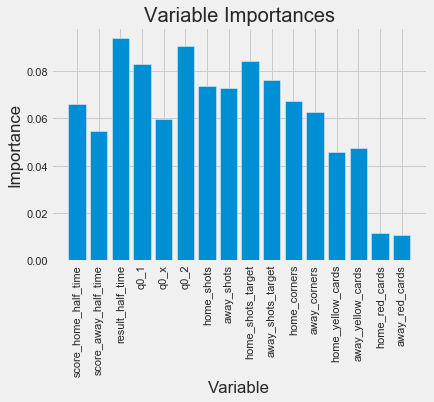

In [202]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as dibu
import matplotlib.axes as axes

%matplotlib inline

# Set the style
dibu.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
dibu.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
dibu.xticks(x_values, features, rotation='vertical')

# Axis labels and title
dibu.ylabel('Importance'); dibu.xlabel('Variable'); dibu.title('Variable Importances'); 

## Random forest. Performance with cross-validation

In [203]:
from sklearn.model_selection import KFold
kf = KFold(25, shuffle=True)

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
#VER SI CAMBIAR ACCURACY POR METRIC
scores = cross_val_score(rf, x_total, y_total, cv=5, scoring=metric)
print('RANDOM FOREST PERFORMANCE WITH CROSS-VALIDATION\n',scores)
average=np.mean(scores)
print('\nAveraged score:',average)

RANDOM FOREST PERFORMANCE WITH CROSS-VALIDATION
 [0.59992811 0.62473041 0.61330935 0.62410072 0.64892086]

Averaged score: 0.6221978908605681


# Correlation matrix

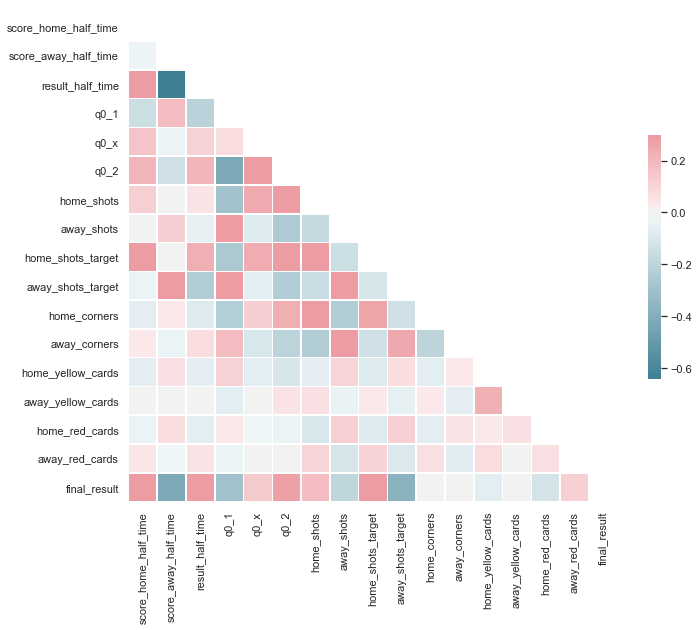

In [7]:
import seaborn as sns
import matplotlib.pyplot as dibu

sns.set(style="white")

# Compute the correlation matrix for the selected features + target
to_print=features + target
corr = data[to_print].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = dibu.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
dibu.show()

# Visualization of features and target in pairs

## Scatter matrix


Now I depict a general view of the correlation across all the variables. The final one is the target, so you can see the correlation with the rest


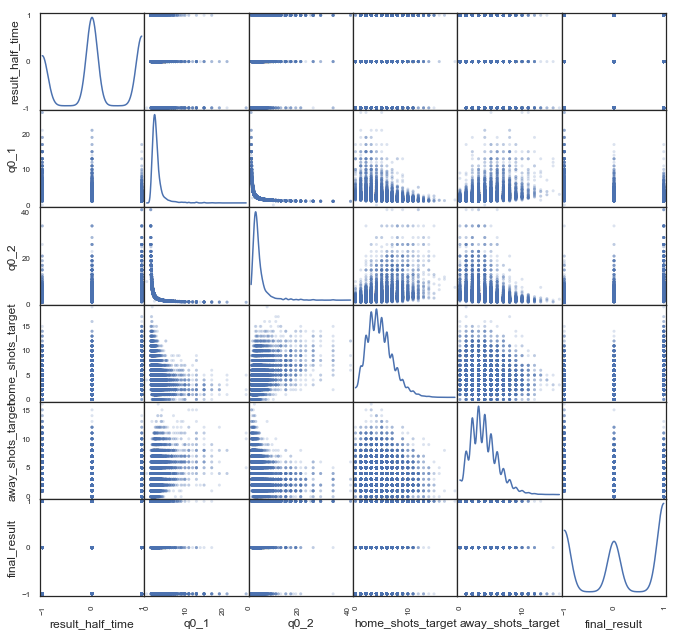


If we considered that the target is not correlated with other variables we can build a probabilistic model with seaborn


AttributeError: 'DataFrame' object has no attribute 'target'

In [23]:
import seaborn as sea
from scipy.stats.stats import pearsonr as correlation

print('\nNow I depict a general view of the correlation across all the variables. The final one is the target, so you can see the correlation with the rest')
to_print=features + target
pd.plotting.scatter_matrix(data[to_print], figsize=[10, 10], alpha=0.2, diagonal='kde')
dibu.show()

print('\nIf we considered that the target is not correlated with other variables we can build a probabilistic model with seaborn')

sea.kdeplot(data.target)
dibu.show()

###### I CALCULATE THE CORRELATION BETWEEN VARIABLES #######
print('\n\n Now I print the linnear correlation between every variable and the target.\n')


for cont in range(0,len(df.columns)-1):
    print(correlation(data.iloc[:,cont],target)[0])

## Decission boundaries

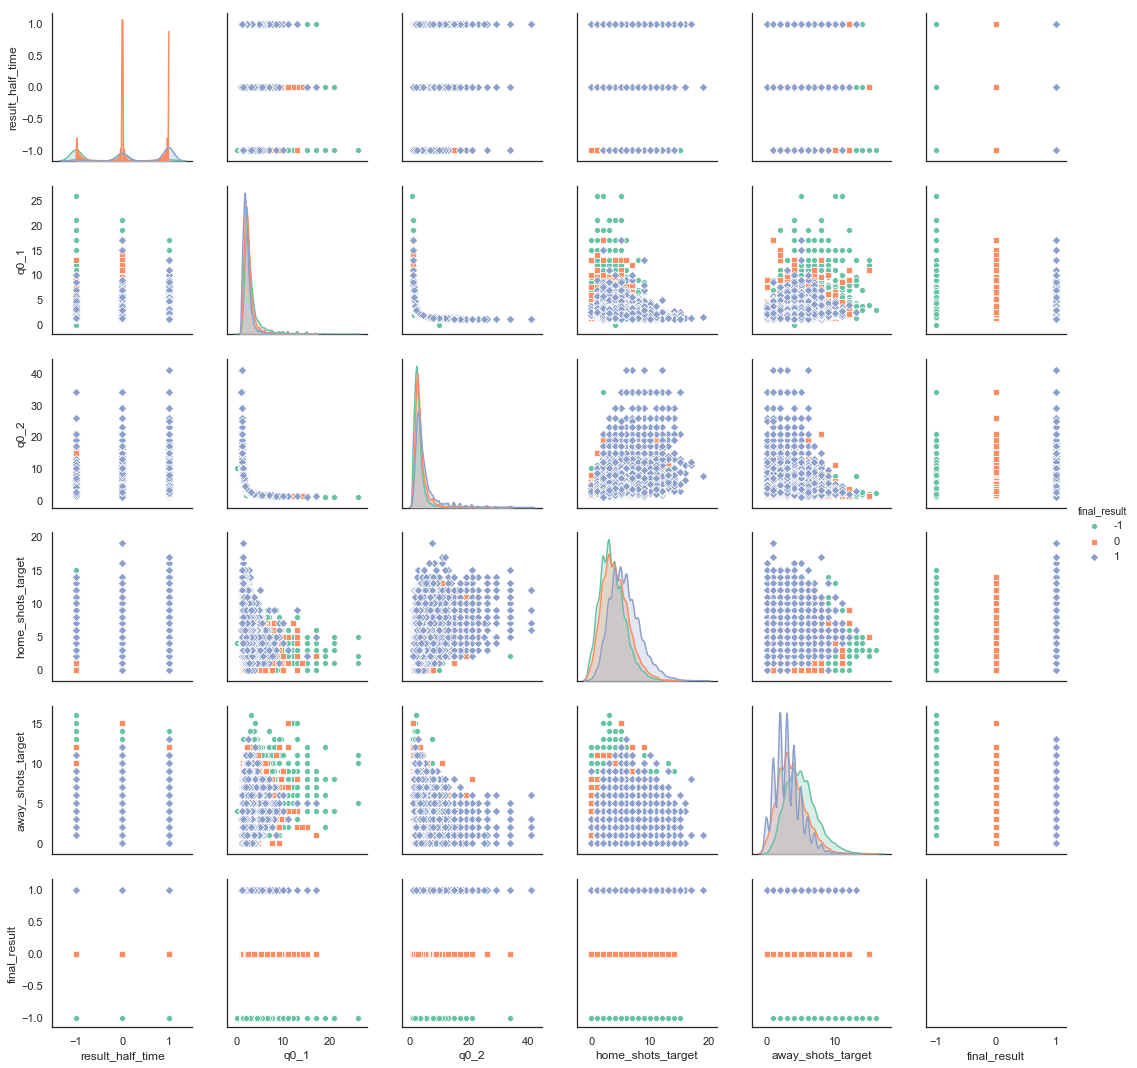

In [27]:
# "hue"=target name
# Number of markers=number of clasess
to_print=features + target
sea.pairplot(data[to_print], kind="scatter", hue='final_result', markers=["o", "s", "D"], palette="Set2")


# Data linearly separable?

   ## Decision boundaries found by logistic regressor

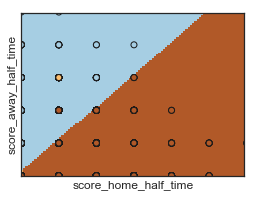

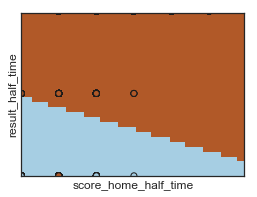

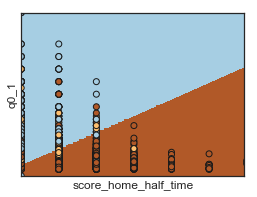

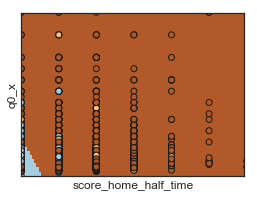

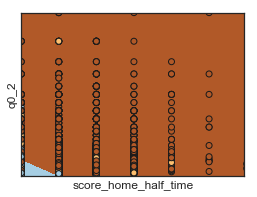

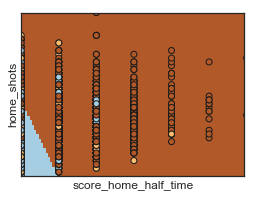

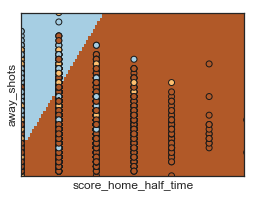

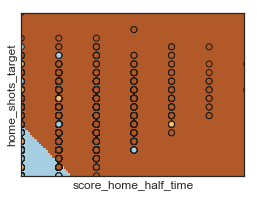

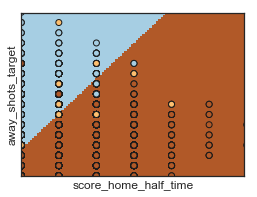

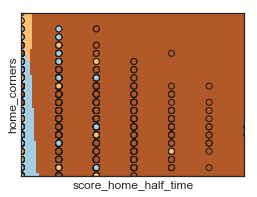

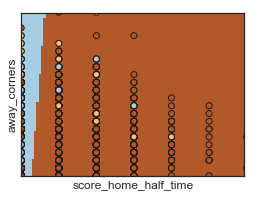

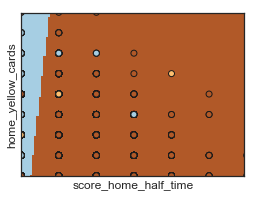

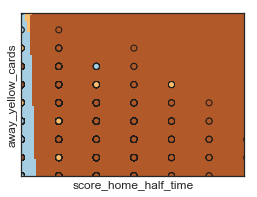

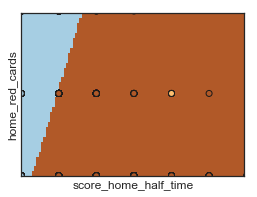

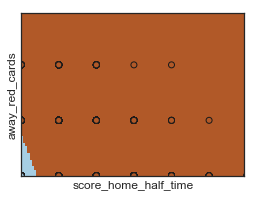

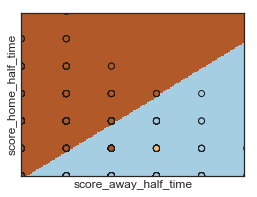

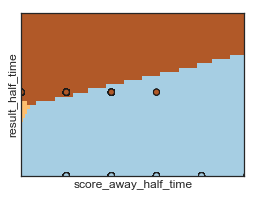

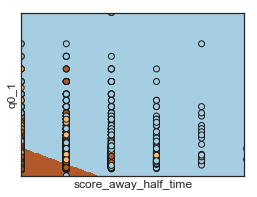

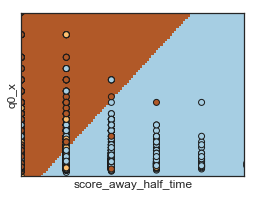

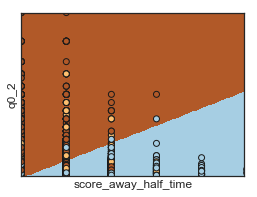

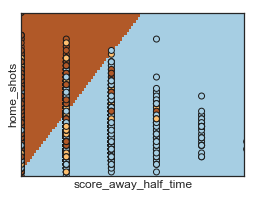

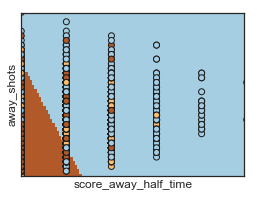

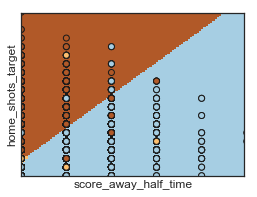

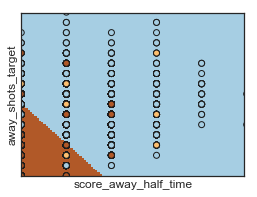

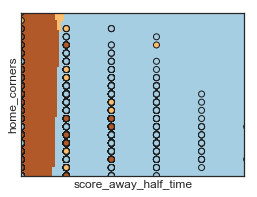

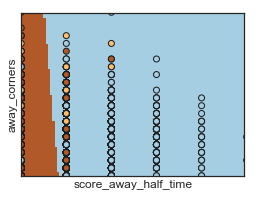

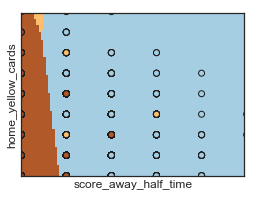

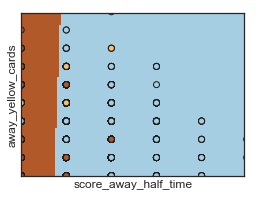

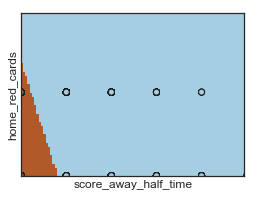

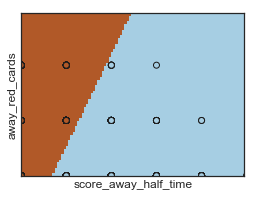

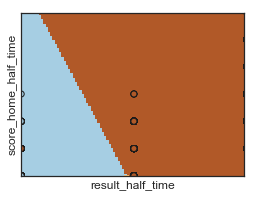

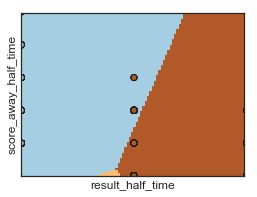

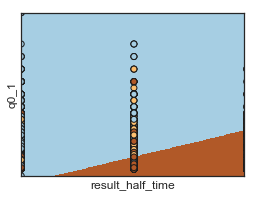

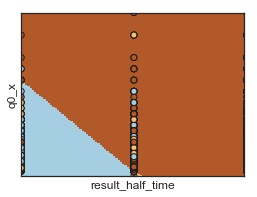

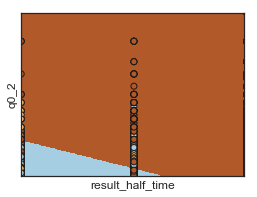

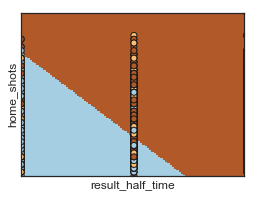

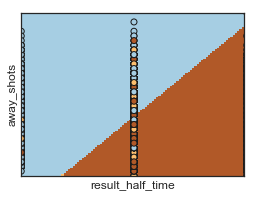

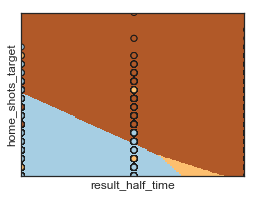

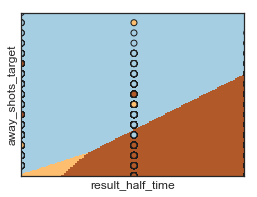

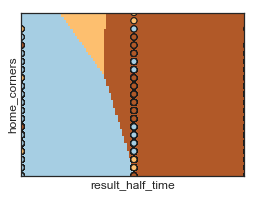

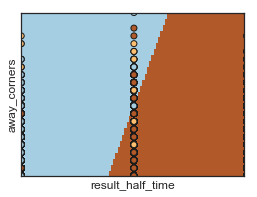

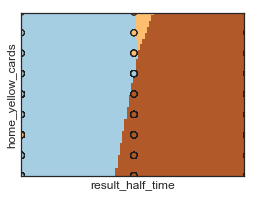

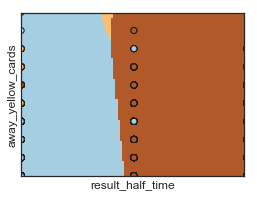

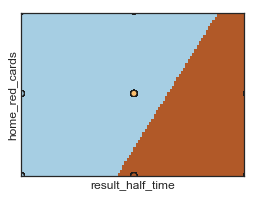

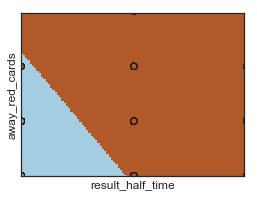

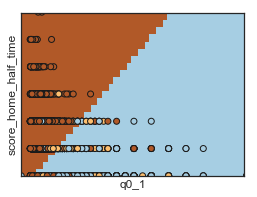

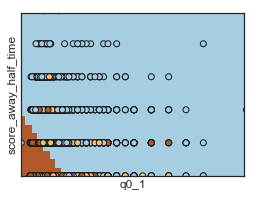

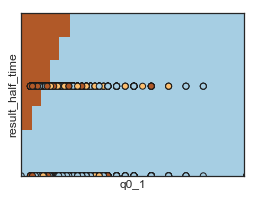

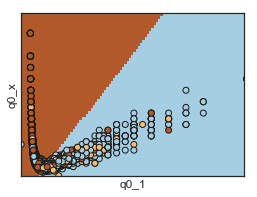

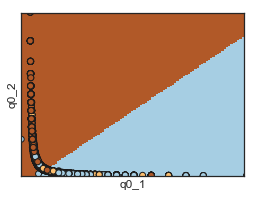

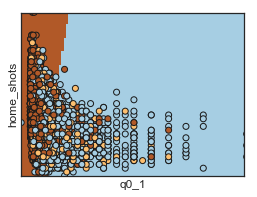

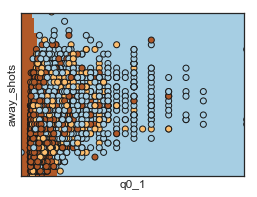

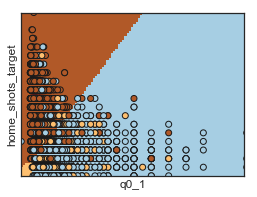

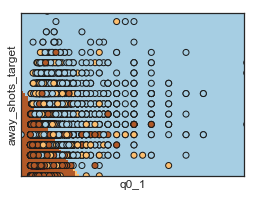

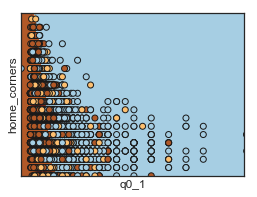

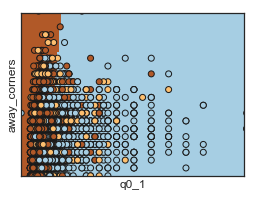

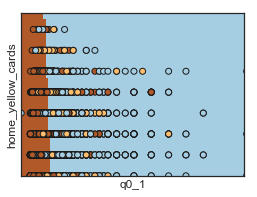

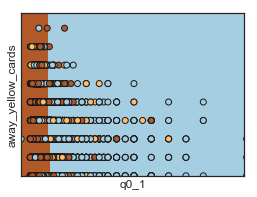

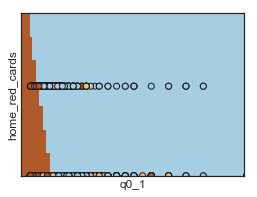

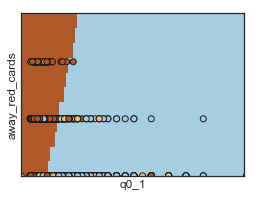

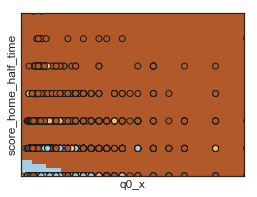

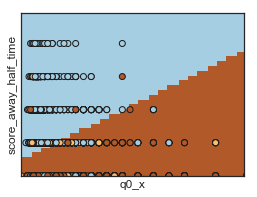

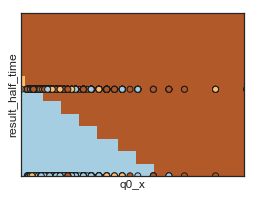

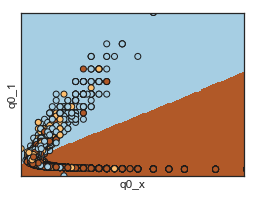

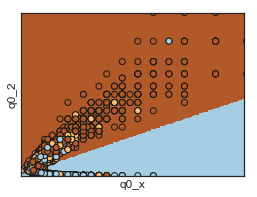

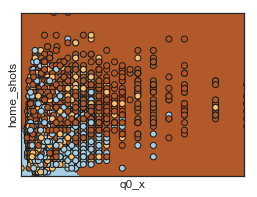

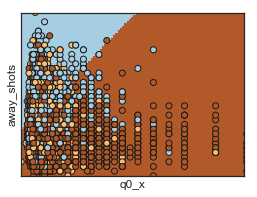

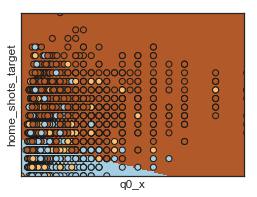

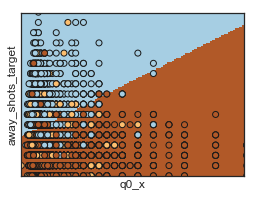

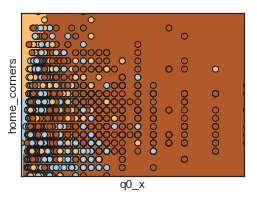

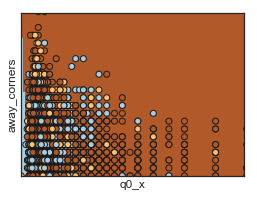

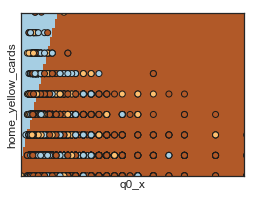

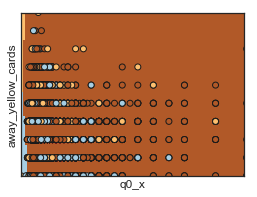

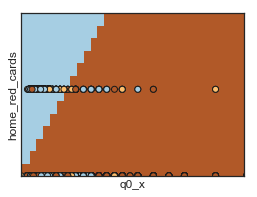

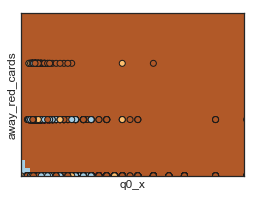

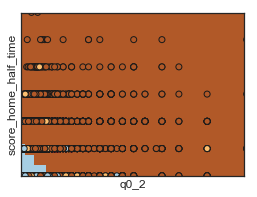

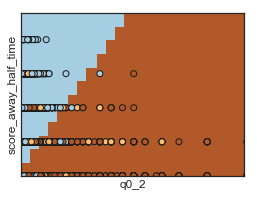

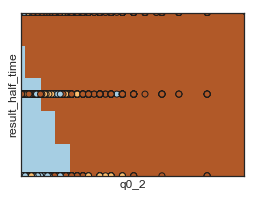

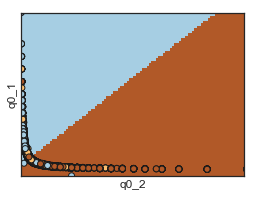

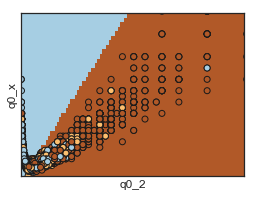

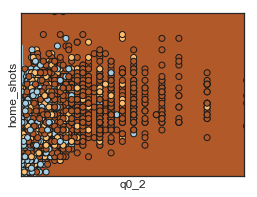

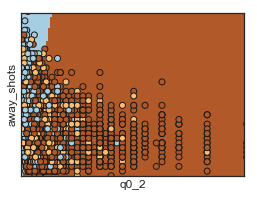

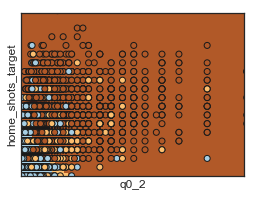

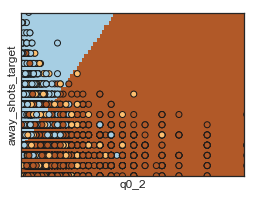

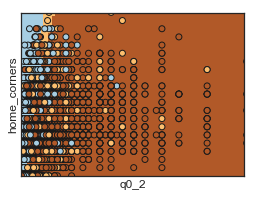

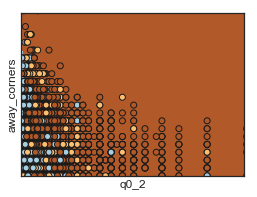

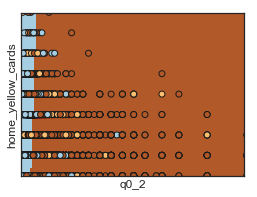

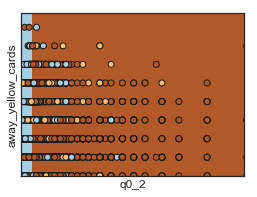

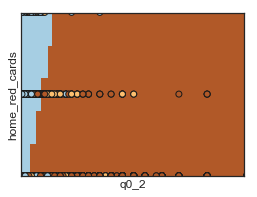

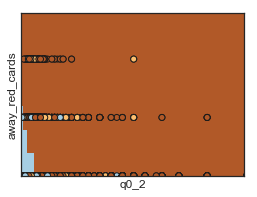

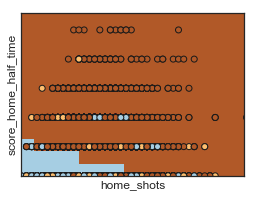

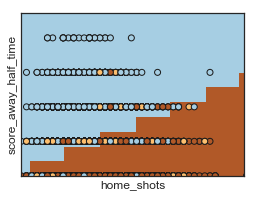

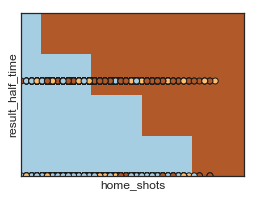

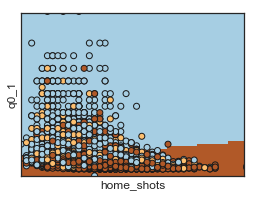

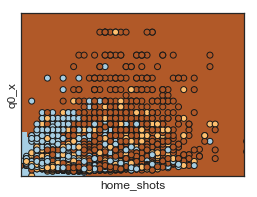

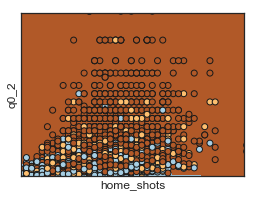

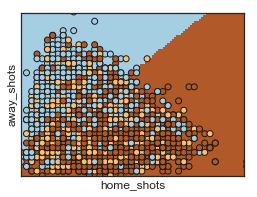

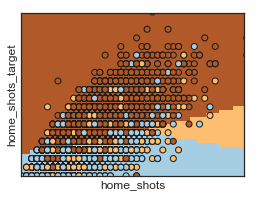

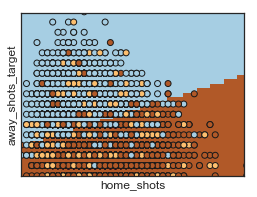

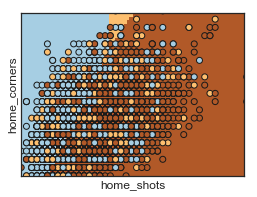

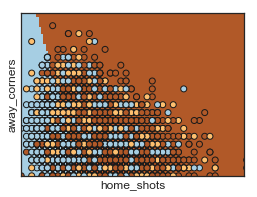

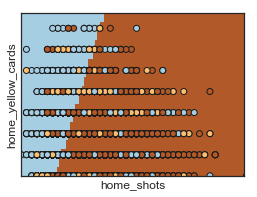

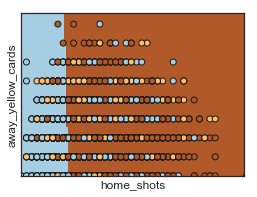

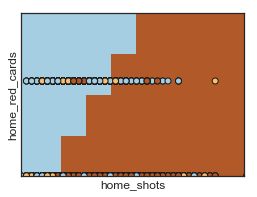

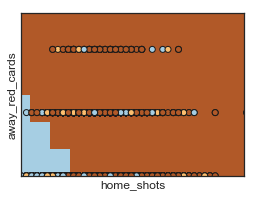

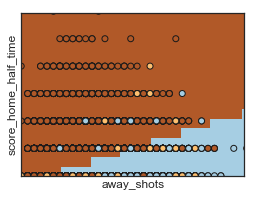

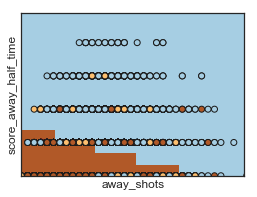

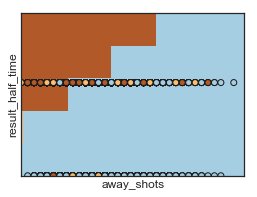

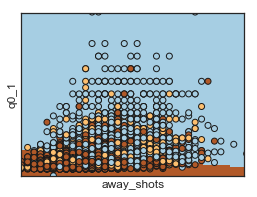

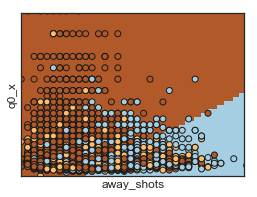

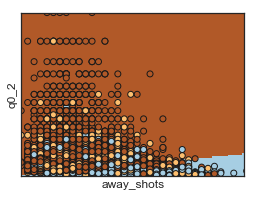

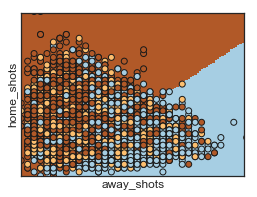

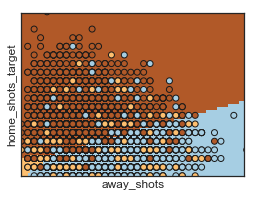

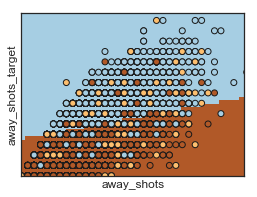

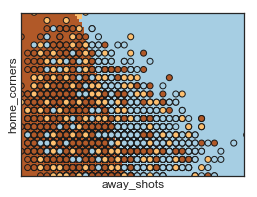

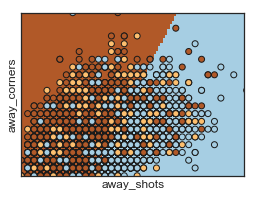

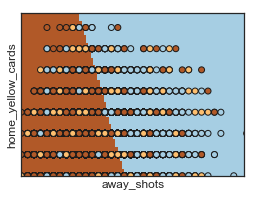

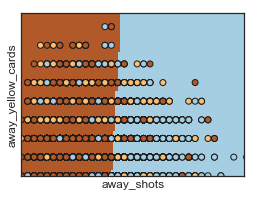

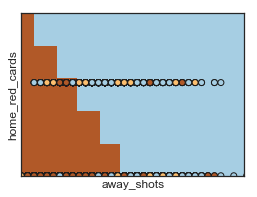

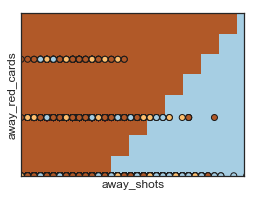

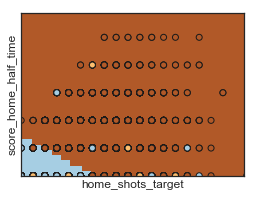

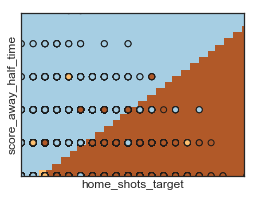

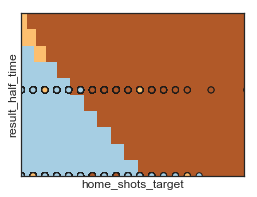

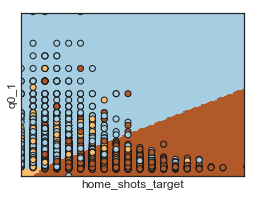

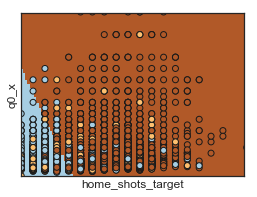

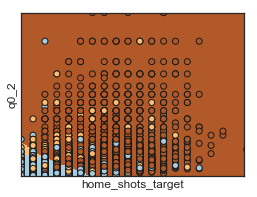

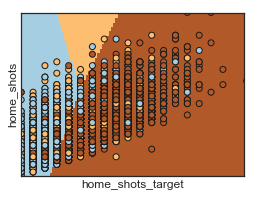

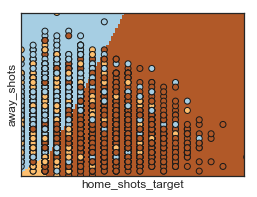

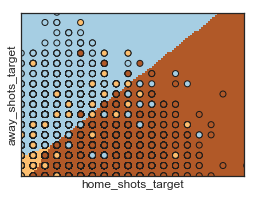

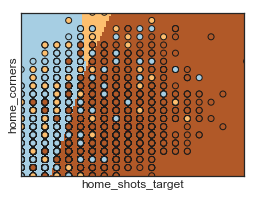

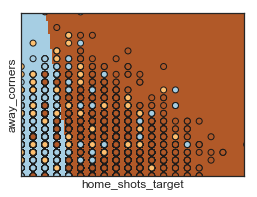

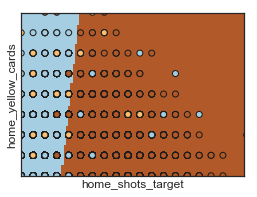

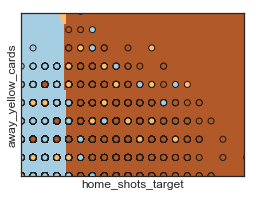

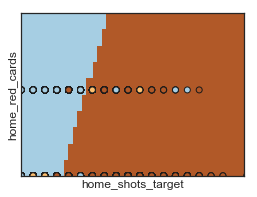

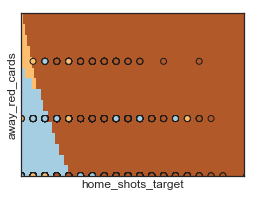

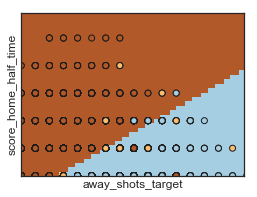

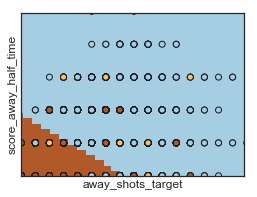

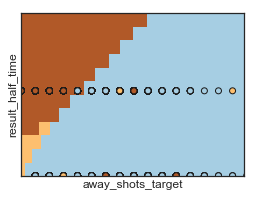

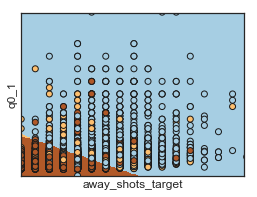

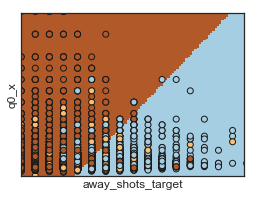

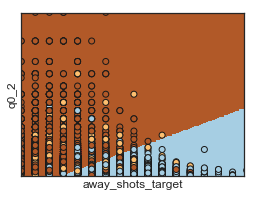

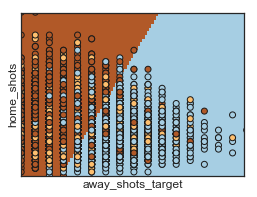

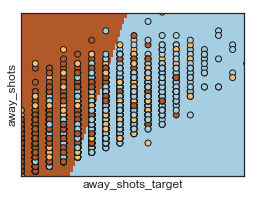

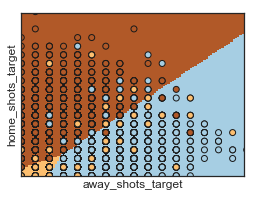

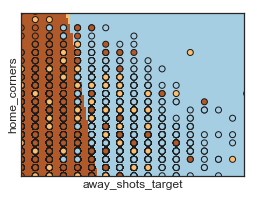

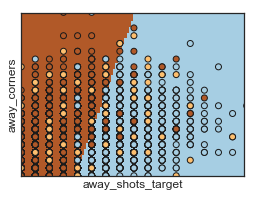

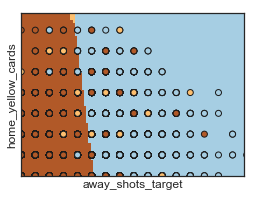

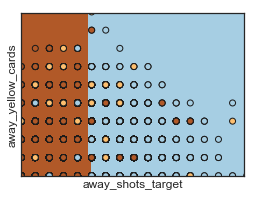

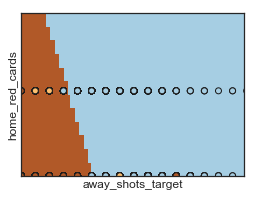

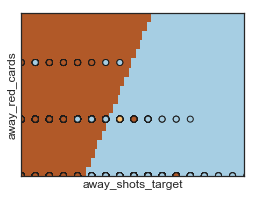

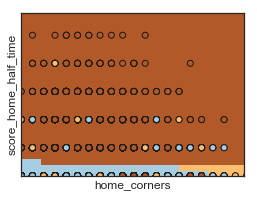

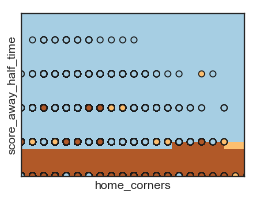

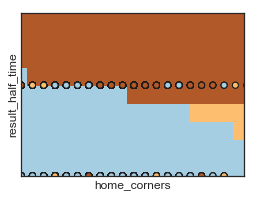

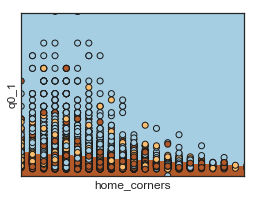

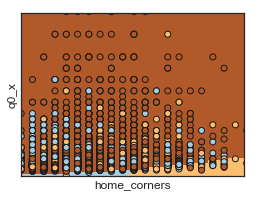

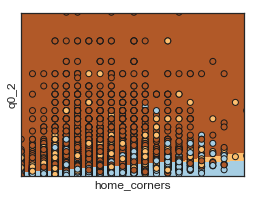

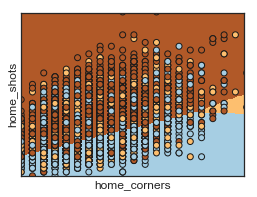

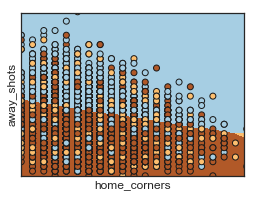

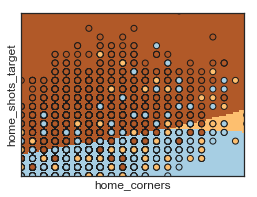

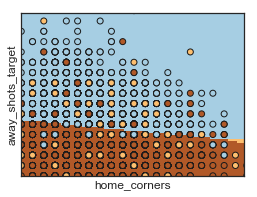

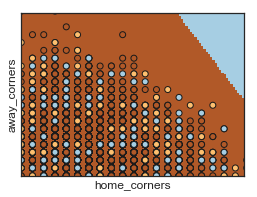

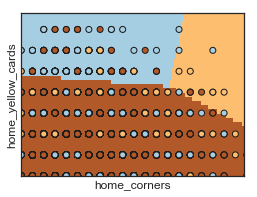

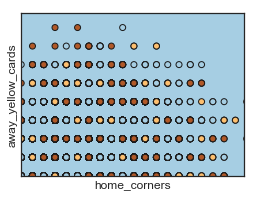

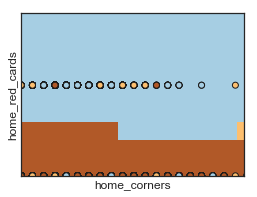

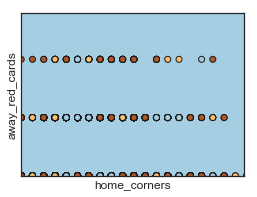

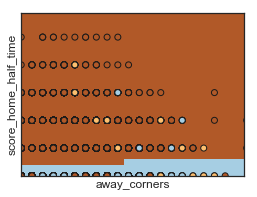

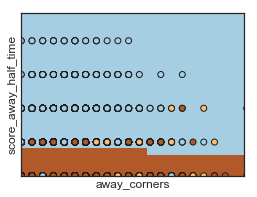

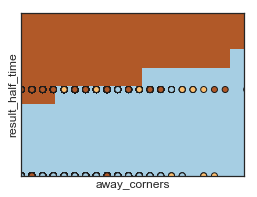

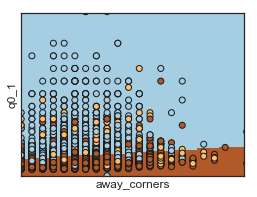

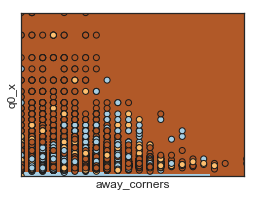

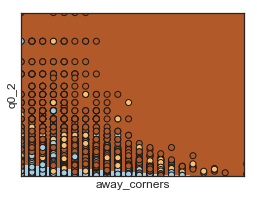

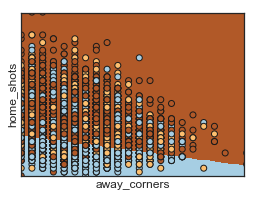

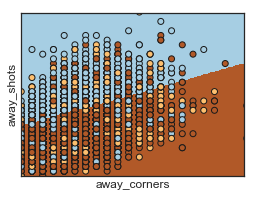

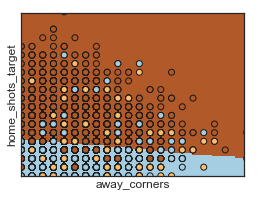

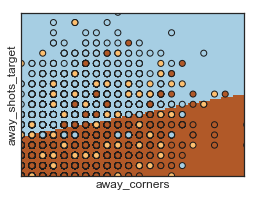

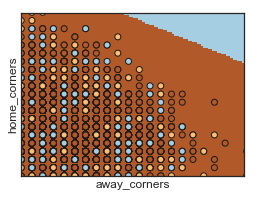

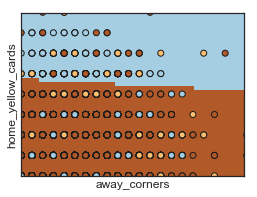

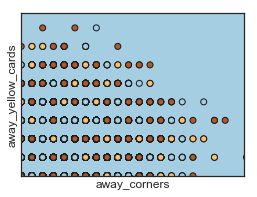

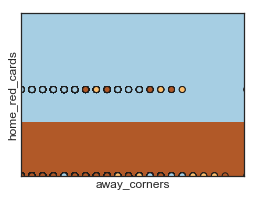

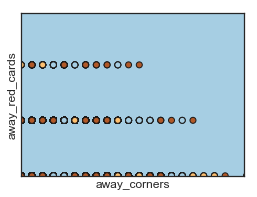

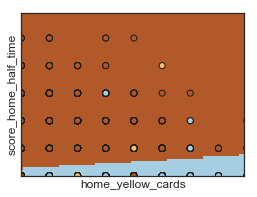

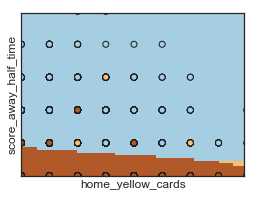

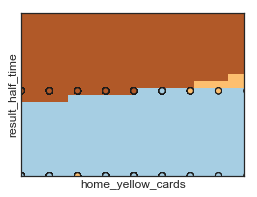

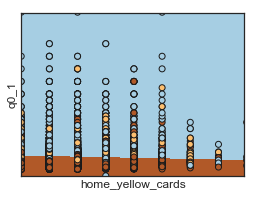

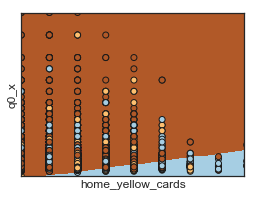

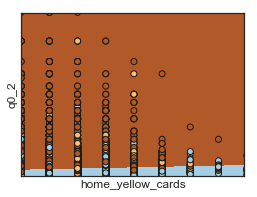

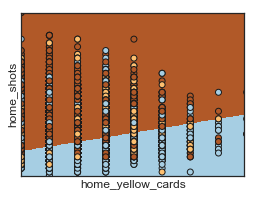

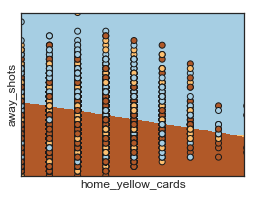

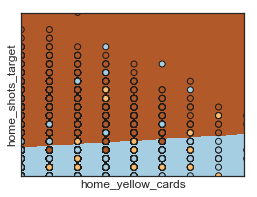

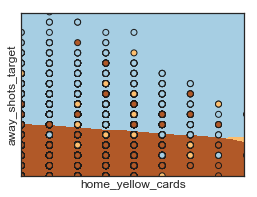

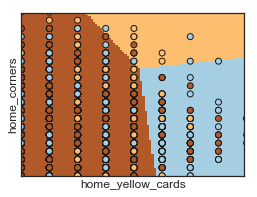

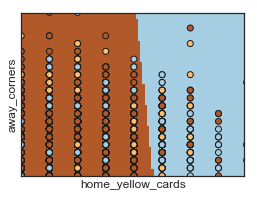

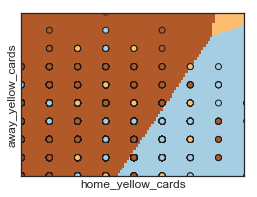

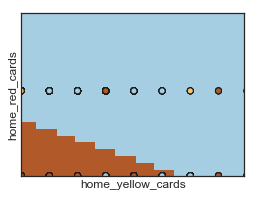

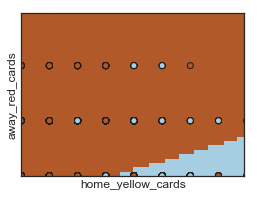

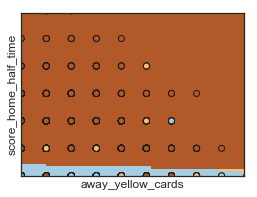

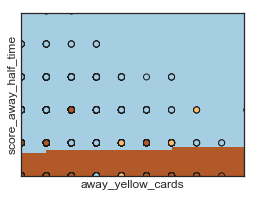

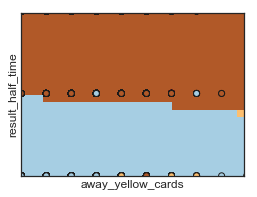

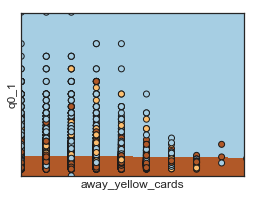

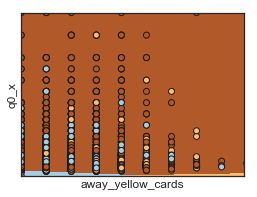

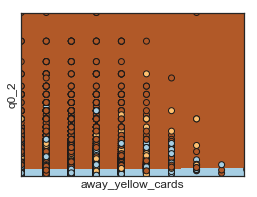

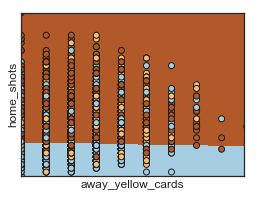

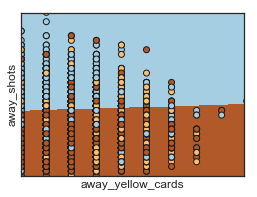

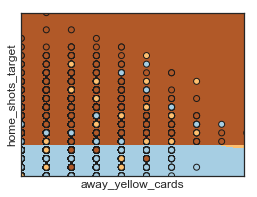

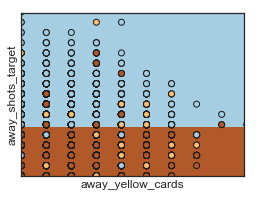

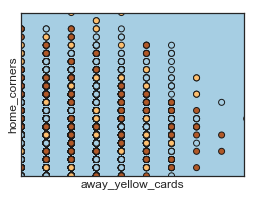

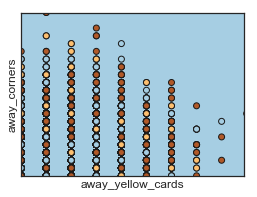

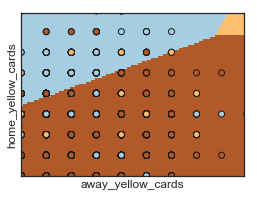

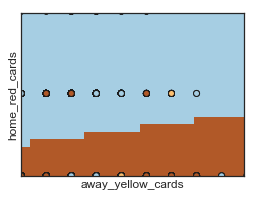

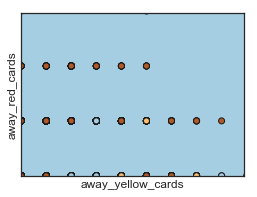

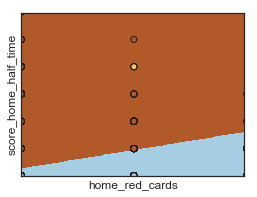

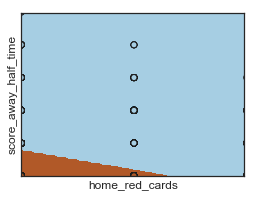

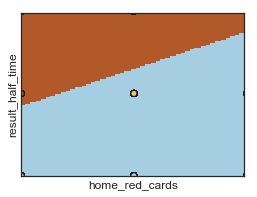

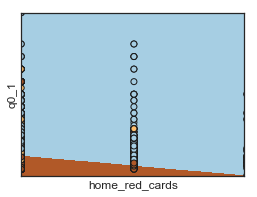

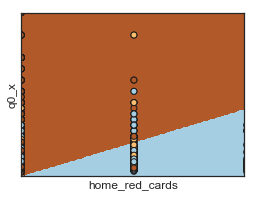

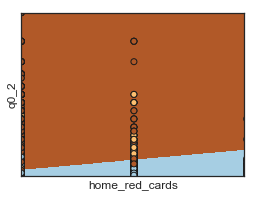

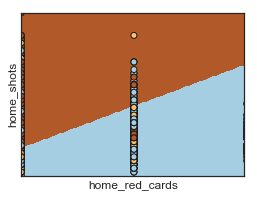

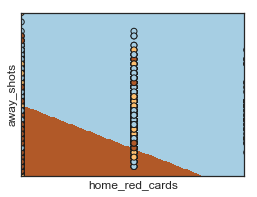

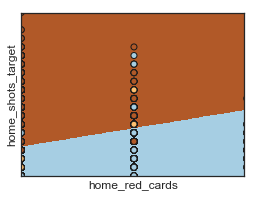

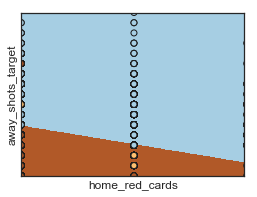

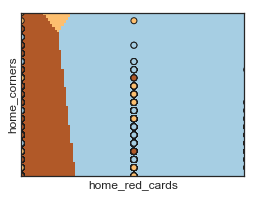

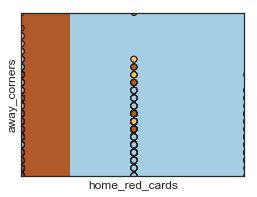

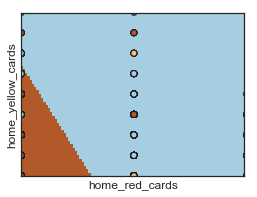

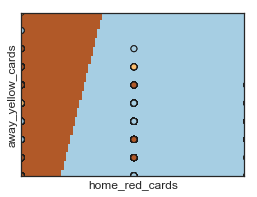

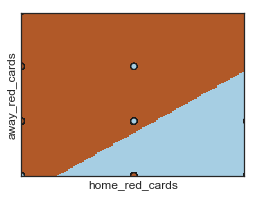

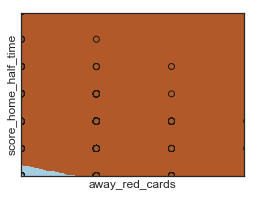

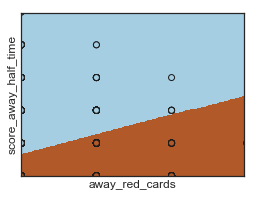

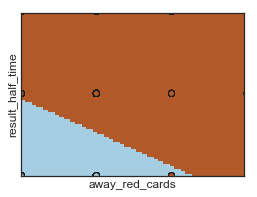

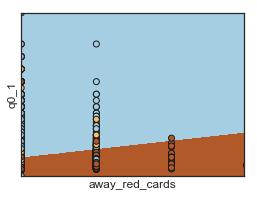

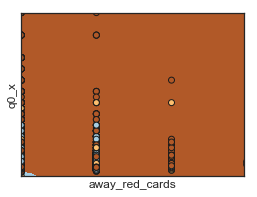

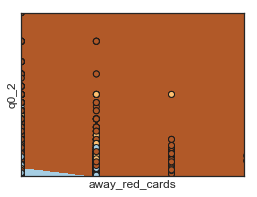

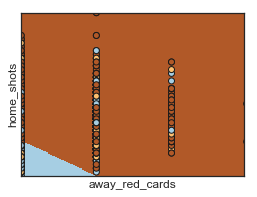

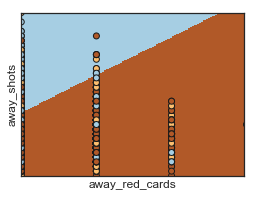

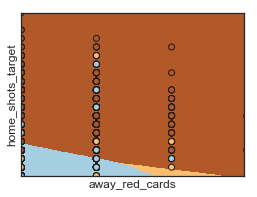

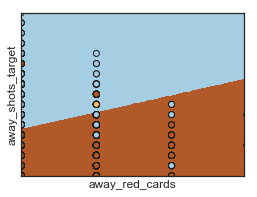

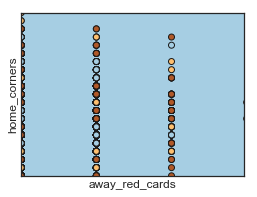

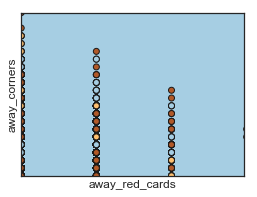

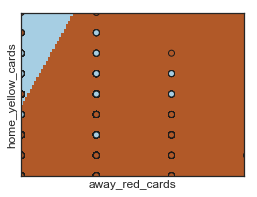

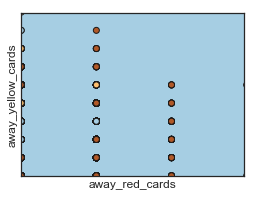

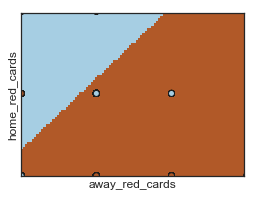

In [8]:
# DECISSION BOUNDARIES WITH A LOGISTIC CLASSIFIER TO STUDY DATA LINEALITY
# CARRIED OUT WITH THE WHOLE SET OF DATA
from sklearn import linear_model
import numpy as np
n=len(features)
logreg = linear_model.LogisticRegression(C=1e5)
for i in range(0,n):
    for j in range(0,n):
        if i!=j:
            feature1=str(features[i])
            feature2=str(features[j])
            to_print=[feature1,feature2]
            X = data[to_print]  
            logreg.fit(X, y_total) # Training for only a couple of features and y
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            x_min, x_max = X[feature1].min() , X[feature1].max()
            h=(float(x_max)-float(x_min))/100 # step size in the mesh
            y_min, y_max = X[feature2].min() , X[feature2].max()
            x_min=float(x_min)
            x_max=float(x_max)
            y_min=float(y_min)
            y_max=float(y_max)
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            dibu.figure(1, figsize=(4, 3))
            dibu.pcolormesh(xx, yy, Z, cmap=dibu.cm.Paired)

            # Plot also the training points
            dibu.scatter(X[feature1], X[feature2], c=y_total, edgecolors='k', cmap=dibu.cm.Paired)
            dibu.xlabel(feature1)
            dibu.ylabel(feature2)

            dibu.xlim(xx.min(), xx.max())
            dibu.ylim(yy.min(), yy.max())
            dibu.xticks(())
            dibu.yticks(())

            dibu.show()

## Performance of the logistic regressor

In [205]:
# CARRIED OUT ON THE WHOLE SET OF DATA
from sklearn.model_selection import KFold
kf = KFold(25, shuffle=False)

from sklearn.model_selection import cross_val_score
logreg = linear_model.LogisticRegression(C=1e5)


scores = cross_val_score(logreg, x_total, y_total, cv=5, scoring=metric)
print('PERFORMANCE OF LOGISTIC REGRESSOR WITH CROSS-VALIDATION:\n',scores)
average=np.mean(scores)
print('\nAveraged score:',average)

PERFORMANCE OF LOGISTIC REGRESSOR WITH CROSS-VALIDATION:
 [0.64701653 0.65851905 0.66510791 0.65539568 0.68201439]

Averaged score: 0.6616107143041857


# PCA

In [149]:
#X=data[features] #We use the whole original set of data
#X_train, X_test, Y_train, Y_test = train_test_split(x_total, y_total, test_size = 0.2, random_state=0)

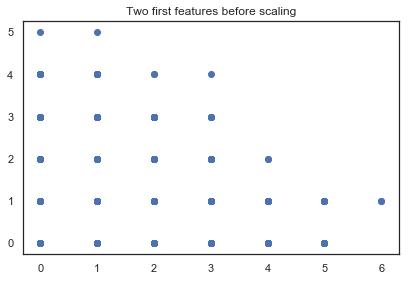

In [206]:
# We use the complete set of data
# plot  X data before PCA
X0 = data[features].iloc[:,0]
X1 = data[features].iloc[:, 1]
dibu.scatter(X0, X1)
# Axis title
dibu.title('Two first features before scaling'); 



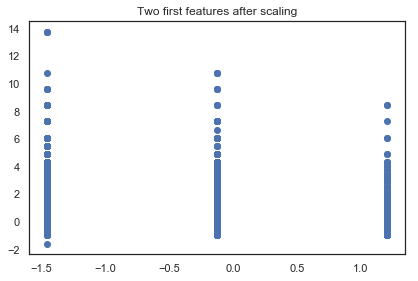

In [207]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_total)
#X_scaled = sc.transform(X_scaled)
#X_test = sc.transform(X_test)
# plot  X_scaled data
X0 = X_scaled[:, 0]
X1 = X_scaled[:, 1]
dibu.scatter(X0, X1)
# Axis title
dibu.title('Two first features after scaling'); 



In [214]:
# YOU MAY WANT TO CHANGE THE NUMBER OF COMPONENTS HERE, AFTER SEING THE FIGURE OF PCA 
from sklearn.decomposition import PCA
PCA_components=11
pca = PCA(n_components=PCA_components)
pca.fit(x_scaled)
x_trans=pca.fit_transform(x_scaled)

In [215]:
print(pca.components_)

[[ 0.20614503 -0.17966442  0.24486317 -0.30858185  0.26417786  0.39996705
   0.34282617 -0.30177492  0.34033912 -0.29960603  0.23247667 -0.21309506
  -0.10107002  0.04105582 -0.09388238  0.07693306]
 [-0.41517691  0.42251414 -0.59590134 -0.00991955  0.03634722  0.04231214
   0.22726911 -0.17465125  0.03263071  0.02043032  0.33403531 -0.29903141
   0.03491962  0.06201424  0.00709517  0.03240934]
 [ 0.24287777  0.28799893 -0.02429557  0.17317961  0.40004936  0.25773804
   0.22340964  0.43590266  0.2891354   0.47291061  0.0310293   0.19525257
  -0.00418042 -0.04221063  0.08130593 -0.0797132 ]
 [-0.21351269 -0.08708703 -0.09699604  0.13687552  0.44862512  0.33179314
  -0.26627088 -0.10113919 -0.31482463 -0.1035197  -0.12411832 -0.01725353
  -0.37234501 -0.35069021 -0.10190249 -0.35869496]
 [-0.1002854  -0.09718317  0.00162475  0.10527802  0.35676261  0.28141765
  -0.17098043 -0.02684501 -0.21422762 -0.08744039 -0.16606275 -0.06097017
   0.52617272  0.54447161  0.25992131  0.0853353 ]
 [ 0.

In [216]:
print(pca.explained_variance_)

[3.43416207 1.93883664 1.73399731 1.3059193  1.24367343 1.01911769
 0.97317676 0.90759336 0.72937581 0.70859457 0.65894918]


In [217]:
print(x_trans)

[[ 3.63403076  1.39186206  0.74220549 ... -1.78158468  0.63930504
   0.18662965]
 [-1.76005507  0.79165885  0.37408234 ... -0.74208192  0.48417625
   1.0160879 ]
 [ 1.41953885  2.32929363 -0.03536463 ... -0.63837204  0.53634575
  -0.82129276]
 ...
 [ 2.17845944 -0.27216907 -0.58654431 ... -0.14259361 -1.32952808
  -0.53286031]
 [ 6.38711769 -0.37518645  5.06788678 ... -1.79847991  0.04690541
   0.10500253]
 [-1.85394739  1.9280738   1.84161398 ...  0.33416029 -0.75991431
  -0.89788998]]


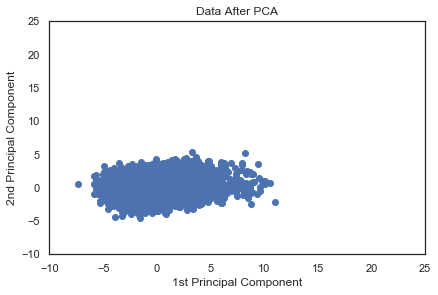

In [218]:
def draw_vector(v0, v1, ax=None):
    ax = ax or dibu.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
X0 = x_trans[:, 0]
X1 = x_trans[:, 1]
dibu.scatter(X0, X1)
dibu.xlim(-10,25);
dibu.ylim(-10,25);
dibu.title('Data After PCA')
dibu.xlabel('1st Principal Component');
dibu.ylabel('2nd Principal Component');
#sc.fit_transform

#dibu.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2)
#for length, vector in zip(pca.explained_variance_, pca.components_):
    #v = vector * 3 * np.sqrt(length)
    #draw_vector(pca.mean_, pca.mean_ + v)
#dibu.axis('equal');

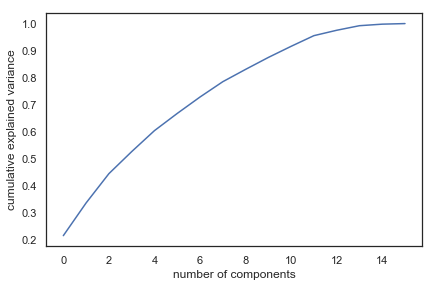

In [219]:
#pca = PCA().fit(data[features])
pca=PCA().fit(x_scaled)
dibu.plot(np.cumsum(pca.explained_variance_ratio_))
dibu.xlabel('number of components')
dibu.ylabel('cumulative explained variance');

## Performance with PCA. Logistic regressor

In [220]:
# CARRIED OUT ON THE WHOLE SET OF DATA (TRANSFORMED BY PCA)
from sklearn.model_selection import KFold
kf = KFold(25, shuffle=False)

from sklearn.model_selection import cross_val_score
logreg = linear_model.LogisticRegression(C=1e5)


scores = cross_val_score(logreg, x_trans, y_total, cv=5, scoring=metric)
print('PERFORMANCE OF LOGISTIC REGRESSOR WHEN USING PCA AS INPUT (USING CV):\n')
print('With ',PCA_components,'components\n ',scores)
average=np.mean(scores)
print('\nAveraged score:',average)

PERFORMANCE OF LOGISTIC REGRESSOR WHEN USING PCA AS INPUT (USING CV):

With  11 components
  [0.63982746 0.64845435 0.64460432 0.6442446  0.66402878]

Averaged score: 0.6482319018976048


## Performance with PCA. Random forest

In [221]:
from sklearn.model_selection import KFold
kf = KFold(25, shuffle=True)

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
#VER SI CAMBIAR ACCURACY POR METRIC
scores = cross_val_score(rf, x_trans, y_total, cv=5, scoring=metric)
print('PERFORMANCE OF RANDOM FOREST WHEN USING PCA (CV)\n')
print('With ',PCA_components,'components\n ',scores)
average=np.mean(scores)
print('Average=',average)

PERFORMANCE OF RANDOM FOREST WHEN USING PCA (CV)

With  11 components
  [0.59130122 0.60531991 0.61690647 0.60467626 0.62266187]
Average= 0.6081731480380038


# Clustering

In [222]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_total)


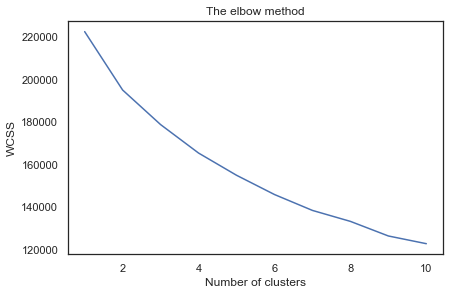

In [223]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'the elbow'
dibu.plot(range(1, 11), wcss)
dibu.title('The elbow method')
dibu.xlabel('Number of clusters')
dibu.ylabel('WCSS') #within cluster sum of squares
dibu.show()

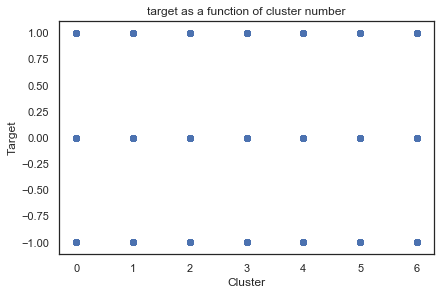

[array([4, 2, 2, ..., 6, 4, 2]), array([ 1,  0, -1, ...,  1,  1, -1], dtype=int64)]

Predictions of clusters:
 [4 2 2 ... 6 4 2]


In [226]:
# ENTER THE NUMBER OF OPTIMAL CLUSTERS FOUND BY THE ELBOW RULE
num_clusters=7
kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)

pred_matrix=[]
pred_matrix.append(y_kmeans)
pred_matrix.append(y_total)
dibu.scatter(y_kmeans,y_total)
# Axis labels and title
dibu.ylabel('Target'); dibu.xlabel('Cluster'); dibu.title('target as a function of cluster number'); 
dibu.show()

print(pred_matrix) # K-means map the clusters 0,1,2,....
print('\nPredictions of clusters:\n',y_kmeans)

## Performance of clusters as clasiffiers

In [227]:
# TO REPEAT KMEANS WITH THE OPTIMAL VALUE OF K, NOT NECESSARILY = num labels
# MAPPING OF THE CLASTERS INTO y LABELS
mapping = {
    0: -1,
    1: 1,
    2: 2
}

y_kmeans = [mapping[i] for i in y_kmeans]
print(y_total)


KeyError: 4

In [ ]:
# PRINTING ACCURACY WHEN USING CLUSTERING AS CLASSIFIER
right=sum([y_kmeans[i]==y_total[i] for i in range(len(y_kmeans)) ])
acc=right/len(y_kmeans)
print(acc)


# Using cluster classification as new features

## Performance. Logistic regressor

In [228]:
data_clust=data[features]
data_clust['clust']=y_kmeans

In [229]:
# CARRIED OUT ON THE WHOLE SET OF DATA + CLUST AS NEW FEATURE
from sklearn.model_selection import KFold
kf = KFold(25, shuffle=False)

from sklearn.model_selection import cross_val_score
logreg = linear_model.LogisticRegression(C=1e5)


scores = cross_val_score(logreg, data_clust, y_total, cv=5, scoring=metric)
print('PERFORMANCE OF LOGISTIC REGRESSOR WHEN ADDING A CLUSTER FEATURE\n')
print('With clustering \n',scores)
average=np.mean(scores)
print('Average=',average)

PERFORMANCE OF LOGISTIC REGRESSOR WHEN ADDING A CLUSTER FEATURE

With clustering 
 [0.6480949  0.65564342 0.66618705 0.65683453 0.67877698]
Average= 0.6611073757816177


## Performance. Random forest

In [230]:
from sklearn.model_selection import KFold
kf = KFold(25, shuffle=True)

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()

scores = cross_val_score(rf, data_clust, y_total, cv=5, scoring=metric)

print('PERFORMANCE OF RANDOM FOREST WHEN ADDING A CLUSTER FEATURE\n')
print('With clustering \n',scores)
average=np.mean(scores)
print('Average=',average)

PERFORMANCE OF RANDOM FOREST WHEN ADDING A CLUSTER FEATURE

With clustering 
 [0.61502516 0.61466571 0.61942446 0.61654676 0.63669065]
Average= 0.6204705480762767
